<a href="https://colab.research.google.com/github/jwoonge/ML-projects/blob/master/assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis
20141261 송제웅  
<hr>  

## 0. Import library
---
import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

## 1. Load dataset
---


In [ ]:
drive.mount('/content/gdrive')
data = np.loadtxt('gdrive/My Drive/4-2/08/data-pca.txt', delimiter=',')

## 2. Z-scoring data normalization
---


In [3]:
def normalize_data(data):
    mean = np.average(data, axis=0)
    stdev = np.std(data, axis=0)
    return (data-mean)/stdev

## 3. Covariance matrix  
---
$\Sigma = \frac{1}{n}Z^T*Z$

In [4]:
def covariance(data):
    return np.matmul(data.T, data)/data.shape[0]

## 4. Principal Components
---


In [5]:
def principal_direction(covariance):
    eig_value, eig_vector = np.linalg.eig(covariance)
    print(eig_value, eig_vector)
    tmp = []
    dim = len(eig_value)
    for i in range(dim):
        tmp.append([eig_value[i], eig_vector[:,i]])
    tmp.sort(key=lambda x:x[0], reverse=True)
    eig_values = []; eig_vectors = []; axis = []
    for i in range(dim):
        eig_value = tmp[i][0]
        eig_vector = tmp[i][1]
        eig_values.append(eig_value)
        eig_vectors.append(eig_vector)
        axis.append(eig_vector*eig_value)
    return np.array(eig_values), np.array(eig_vectors), np.array(axis)

## 5. Projection
---


In [6]:
def projection(point, axis):
    ks = np.dot(point, axis)/np.sum(np.square(axis))
    ks = ks.reshape((len(ks),1))
    return np.matmul(ks, axis.reshape(1,len(axis)))

## 6. Main Calculation

In [ ]:
data_norm = normalize_data(data)
x_norm = data_norm[:,0]
y_norm = data_norm[:,1]

covar = covariance(data_norm)
eig_value, eig_vector, axis = principal_direction(covar)

projected1 = projection(data_norm, axis[0,:])
projected2 = projection(data_norm, axis[1,:])
slope1 = axis[0][1]/axis[0][0]
slope2 = axis[1][1]/axis[1][0]



---
# RESULTS
---
## 1. Plot the original data points
---

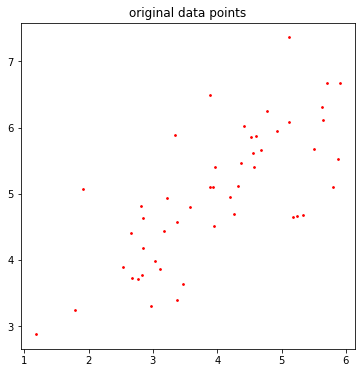

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:,1], c='r', s=3)
plt.title('original data points')
plt.show()














## 2. Plot the normalized data points
---

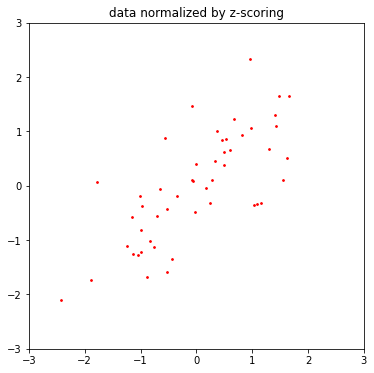

In [9]:
arange = np.array([-3,3])
plt.figure(figsize=(6,6))
plt.scatter(x_norm, y_norm, c='r', s=3) 
plt.xlim(arange)
plt.ylim(arange)
plt.title('data normalized by z-scoring')
plt.show()


















## 3. Plot the principal axis
---

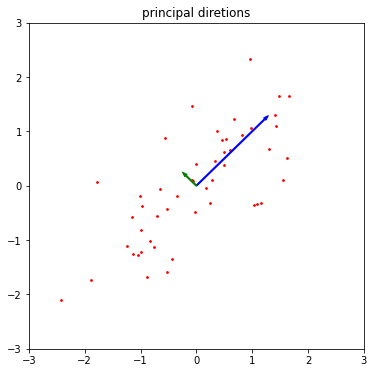

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(x_norm, y_norm, c='r', s=3)
plt.xlim(arange)
plt.ylim(arange)
plt.arrow(0, 0, axis[0][0], axis[0][1], color='b', width=0.02)
plt.arrow(0, 0, axis[1][0], axis[1][1], color='g', width=0.02)
plt.title('principal diretions')
plt.show()















## 4. Plot the first principal axis
---

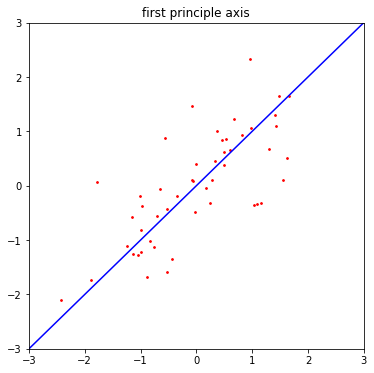

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(x_norm, y_norm, c='r', s=3)
plt.xlim(arange)
plt.ylim(arange)
plt.plot(arange,arange*slope1, c='b')
plt.title('first principle axis')
plt.show()
















## 5. Plot the project of the normalized data points onto the first principal axis
---

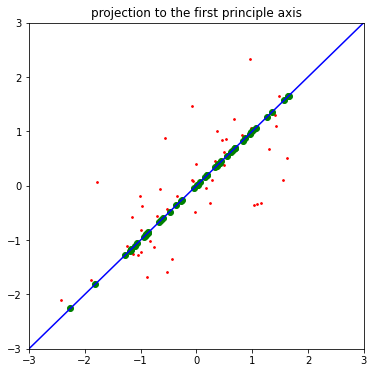

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(x_norm, y_norm, c='r', s=3)
plt.xlim(arange)
plt.ylim(arange)
plt.plot(arange, arange*slope1, c='b')
plt.scatter(projected1[:,0], projected1[:,1], c='g')
plt.title('projection to the first principle axis')
plt.show()













## 6. Plot the lines between the normalized data points and their projection points on the first principal axis
---

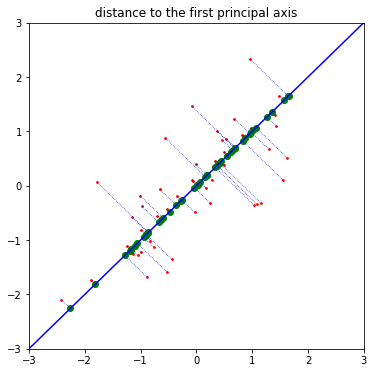

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(x_norm, y_norm, c='r', s=3)
plt.xlim(arange)
plt.ylim(arange)
plt.plot(arange, arange*slope1, c='b')
plt.scatter(projected1[:,0], projected1[:,1], c='g')
for i in range(len(data_norm)):
    plt.plot([projected1[i,0], data_norm[i,0]], [projected1[i,1], data_norm[i,1]], c='b', linewidth=0.7, linestyle=':')
plt.title('distance to the first principal axis')
plt.show()










## 7. Plot the second principal axis
---

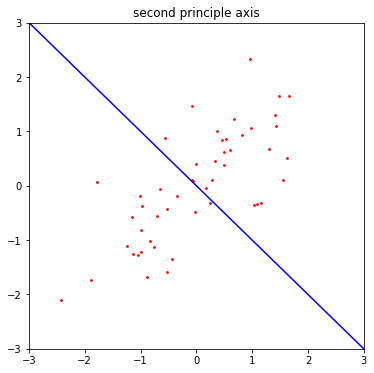

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(x_norm, y_norm, c='r', s=3)
plt.xlim(arange)
plt.ylim(arange)
plt.plot(arange,arange*slope2, c='b')
plt.title('second principle axis')
plt.show()
















## 8. Plot the project of the normalized data points onto the second principal axis
---


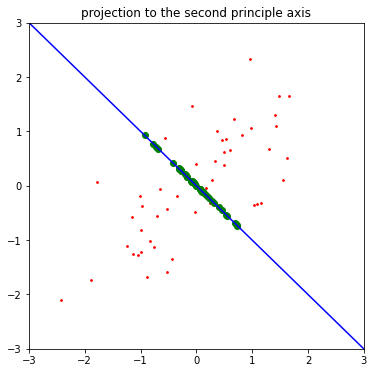

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(x_norm, y_norm, c='r', s=3)
plt.xlim(arange)
plt.ylim(arange)
plt.plot(arange, arange*slope2, c='b')
plt.scatter(projected2[:,0], projected2[:,1], c='g')
plt.title('projection to the second principle axis')
plt.show()











## 9. Plot the lines between the normalized data points and their projection points on the second principal axis
---


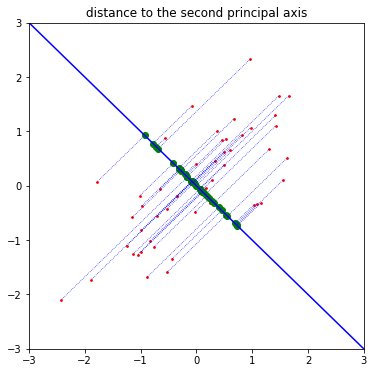

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(x_norm, y_norm, c='r', s=3)
plt.xlim(arange)
plt.ylim(arange)
plt.plot(arange, arange*slope2, c='b')
plt.scatter(projected2[:,0], projected2[:,1], c='g')
for i in range(len(data_norm)):
    plt.plot([projected2[i,0], data_norm[i,0]], [projected2[i,1], data_norm[i,1]], c='b', linewidth=0.7, linestyle=':')
plt.title('distance to the second principal axis')
plt.show()
